SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. Its assessment approach is based on two main risk drivers of loan default prediction:. 1) willingness to pay and 2) ability to pay. Since not all customers pay back, the company invests in experienced data scientist to build robust models to effectively predict the odds of repayment.

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

There are two types of risk models in general: New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies. The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

It is your job to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.

In [1]:
# Import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
demographics=pd.read_csv('Loan default prediction/traindemographics.csv')
perform=pd.read_csv('Loan default prediction/trainperf.csv')
prevloans=pd.read_csv('Loan default prediction/trainprevloans.csv')

In [8]:
# check summary of each dataset
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


- Three columns have missing values and some have to be dropped

In [4]:
perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


- One column has too many missing values and will have to be dropped

In [5]:
prevloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


- drop the one columns that has missing values

# Statistical analysis

In [6]:
perform.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


- The number of times most people have applied for loans is between 2 and 12 times
- The majority have taken loans for 30 days as term loan
- Most people have taken loans from 5000 to 20000

In [7]:
prevloans.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


# Data cleansing and Transformation

- drop columns that have missing values more than 50% of the dataset.
- Subtract approved date from closed date to get the number of days it took the customer to repay loan
- Change the datatype of the date column
- Subtract first due date from first repaid date to get the difference of the days of repaid loan.
- Drop the longitude and latitude columns
- Deal with the imbalanced target variable class

In [8]:
# take a look at the data
demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [9]:
perform.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [10]:
prevloans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [3]:
#drop columns having missing values
demographics.drop(axis=1, labels=['bank_branch_clients','employment_status_clients','level_of_education_clients'],inplace=True)

In [4]:
demographics.drop(axis=1, labels=['longitude_gps','latitude_gps'], inplace=True)

In [5]:
perform.drop('referredby',axis=1,inplace=True)
prevloans.drop('referredby',axis=1,inplace=True)

In [6]:
#change the datatype of date
demographics.drop('birthdate',axis=1,inplace=True)

In [7]:
prevloans['approveddate']=pd.to_datetime(prevloans['approveddate'])
prevloans['approveddate'].dtypes

dtype('<M8[ns]')

In [8]:
#removing the timestamp from date column
prevloans['approveddate']=prevloans['approveddate'].dt.date

In [9]:
# create a function to eliminate the timestamp
def remove_time_stamp(data, column):
    data[column]=pd.to_datetime(data[column])
    data[column]=data[column].dt.date
    return data

In [10]:
remove_time_stamp(prevloans,'creationdate')
remove_time_stamp(prevloans,'closeddate')
remove_time_stamp(prevloans,'firstduedate')
remove_time_stamp(prevloans,'firstrepaiddate')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15,2016-08-15,10000.0,13000.0,30,2016-09-01,2016-09-14,2016-09-01
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28,2017-04-28,10000.0,13000.0,30,2017-05-28,2017-05-30,2017-05-26
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05,2017-03-05,20000.0,23800.0,30,2017-04-26,2017-04-04,2017-04-26
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09,2017-04-09,10000.0,11500.0,15,2017-04-24,2017-04-24,2017-04-24
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17,2017-06-17,10000.0,11500.0,15,2017-07-14,2017-07-03,2017-07-14
...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16,2016-04-16,10000.0,13000.0,30,2016-05-14,2016-05-16,2016-05-13
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18,2016-11-18,30000.0,34400.0,30,2016-12-13,2016-12-19,2016-12-13
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12,2016-06-12,10000.0,13000.0,30,2016-07-09,2016-07-12,2016-07-09
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27,2016-08-27,10000.0,13000.0,30,2016-10-15,2016-09-26,2016-10-15


In [11]:
remove_time_stamp(perform,'approveddate')
remove_time_stamp(perform,'creationdate')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,Good
...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30,2017-07-30,10000.0,13000.0,30,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27,2017-07-27,10000.0,13000.0,30,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25,2017-07-25,10000.0,11500.0,15,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14,2017-07-14,10000.0,13000.0,30,Bad


In [12]:
prevloans['loandays']=(prevloans['closeddate']-prevloans['approveddate']).dt.days


## Data Visualization
- now that we are done with data cleaning, we can now look at our data more closely


In [13]:
#using pandas profiling
from pandas_profiling import ProfileReport
prevloans_report= ProfileReport(prevloans)
prevloans_report

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated with the `pandas-profiling` Python package"><meta name=author content="Simon Brugman and the open source community."><meta name=generator content="Pandas Profiling v3.2.0"><meta name=url content=https://github.com/pandas-profiling/pandas-profiling><meta name=date content="2022-06-01 11:20:00.458934"><title>Pandas Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regular.woff2) forma

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


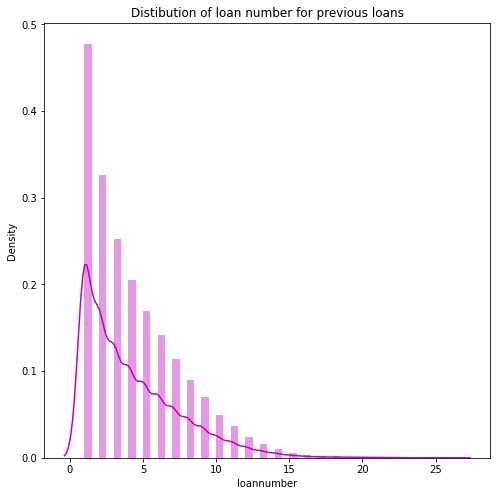

In [12]:
#distribution of loan number for both previous loans and perfomance

fig=plt.figure(figsize=(8,8))
sns.distplot(prevloans['loannumber'],hist=True,color='m')
plt.title('Distibution of loan number for previous loans')

In [20]:
np.mean(prevloans['loannumber'])

4.1893526920750155

The highest range is between 1 and 6 which clearly indicates that the average number of times people have taken loans is 4 times and most people lie in this category since the data is rightly skewed and am sure we will have the same for the performance loans data.

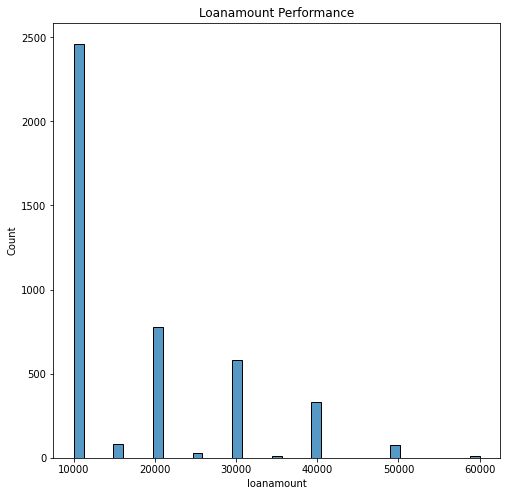

In [27]:
#lets take a look at the loan amount in the performance data
fig=plt.figure(figsize=(8,8))
sns.histplot(perform['loanamount'],palette='magma')
plt.title('Loanamount Performance')

- most people have collected loans from 10,000 to 30,000

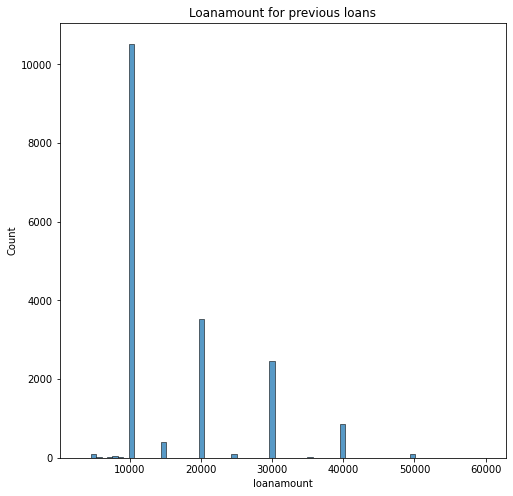

In [31]:
#lets look at it for previous loans
fig=plt.figure(figsize=(8,8))
sns.histplot(prevloans['loanamount'],palette='gist_earth')
plt.title('Loanamount for previous loans')

- the same can be attested for previous loans

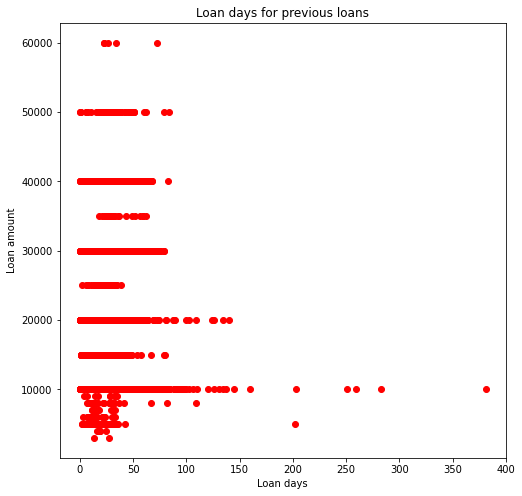

In [51]:
fig=plt.figure(figsize=(8,8))
plt.scatter(prevloans['loandays'],prevloans['loanamount'],color='r')
plt.xlabel('Loan days')
plt.ylabel('Loan amount')
plt.title('Loan days for previous loans')

In [55]:
prevloans['loandays'].describe()

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


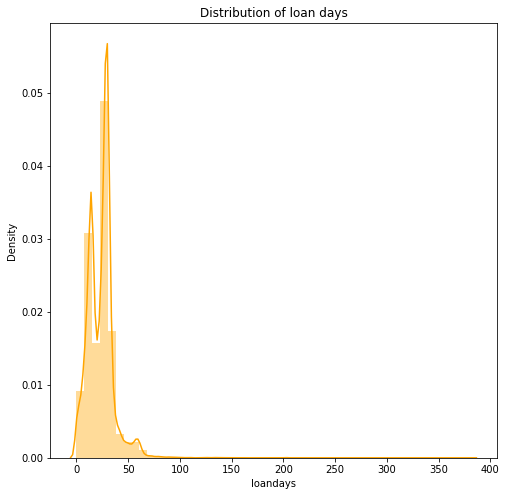

In [58]:
fig=plt.figure(figsize=(8,8))
sns.distplot(prevloans['loandays'],hist=True,color='orange')
plt.title('Distribution of loan days')
prevloans.where(prevloans['loandays']> 180,inplace=True)

In [91]:
#check and remove outliers
#prevloans['z_score'] = (prevloans['loandays'] - prevloans['loandays'].mean()) / prevloans['loandays'].std()
#prevloans[(prevloans['z_score'] < -3) | (prevloans['z_score'] > 3)]

In [66]:
new_loans=prevloans[['loannumber','loandays','termdays','totaldue']]
target=prevloans['loanamount']

## Feature Engineering

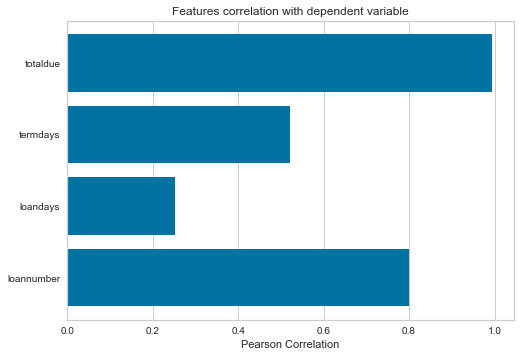

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [14]:
from yellowbrick.target import FeatureCorrelation
feature_names=new_loans.columns
visual=FeatureCorrelation(labels=feature_names, method='pearson')
visual.fit(new_loans,target)
visual.poof()

In [14]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
encod=LabelEncoder()
perform['good_bad_flag']=encod.fit_transform(perform['good_bad_flag'])


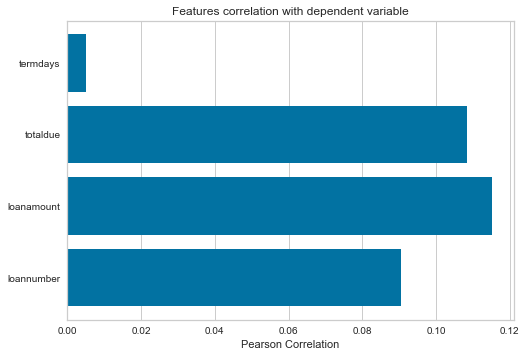

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [15]:
# for the perform data, the target class is imbalanced and therefore we need to handle that using SMOTE
new_perform=perform[['loannumber','loanamount','totaldue','termdays']]
target=perform.iloc[:,-1]
from yellowbrick.target import FeatureCorrelation
feature_names=new_perform.columns
visual=FeatureCorrelation(labels=feature_names,method='pearson')
visual.fit(new_perform,target)
visual.poof()

In [16]:
#test data
test_perform=pd.read_csv('Loan default prediction/testperf.csv')
testloans=pd.read_csv('Loan default prediction/testprevloans.csv')

In [21]:
test_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 non-null   object 
 4   creationdate  1450 non-null   object 
 5   loanamount    1450 non-null   int64  
 6   totaldue      1450 non-null   float64
 7   termdays      1450 non-null   int64  
 8   referredby    184 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.1+ KB


In [22]:
testloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       5907 non-null   object 
 1   systemloanid     5907 non-null   int64  
 2   loannumber       5907 non-null   int64  
 3   approveddate     5907 non-null   object 
 4   creationdate     5907 non-null   object 
 5   loanamount       5907 non-null   float64
 6   totaldue         5907 non-null   float64
 7   termdays         5907 non-null   int64  
 8   closeddate       5907 non-null   object 
 9   referredby       325 non-null    object 
 10  firstduedate     5907 non-null   object 
 11  firstrepaiddate  5907 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 553.9+ KB


In [17]:
#drop column 'referred by' in both sets
testloans.drop('referredby',axis=1,inplace=True)
test_perform.drop('referredby',axis=1,inplace=True)

In [18]:
#change into datetime
remove_time_stamp(testloans,'approveddate')
remove_time_stamp(testloans, 'creationdate')
remove_time_stamp(testloans, 'closeddate')
remove_time_stamp(testloans,'firstduedate')
remove_time_stamp(testloans,'firstrepaiddate')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17,2016-05-17,10000.0,13000.0,30,2016-06-17,2016-06-16,2016-06-16
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04,2017-02-04,30000.0,36800.0,60,2017-03-02,2017-03-06,2017-03-02
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04,2017-03-04,30000.0,34400.0,30,2017-04-02,2017-04-03,2017-04-01
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02,2016-06-02,10000.0,13000.0,30,2016-07-04,2016-07-04,2016-07-04
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16,2016-05-16,10000.0,11500.0,15,2016-06-02,2016-05-31,2016-06-01
...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09,2017-04-09,10000.0,13000.0,30,2017-05-02,2017-05-09,2017-05-02
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15,2017-04-15,10000.0,11500.0,15,2017-04-25,2017-05-02,2017-04-25
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26,2017-06-26,10000.0,13000.0,30,2017-07-13,2017-07-26,2017-07-13
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03,2017-05-03,10000.0,13000.0,30,2017-06-01,2017-06-02,2017-06-01


In [19]:
#calaculate loan days
testloans['loandays']=(testloans['closeddate']-testloans['approveddate']).dt.days

In [20]:
#handle the imbalanced class- target variable using SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

## FIRST PART OF THE MODEL
- New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies.

In [27]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_perform,target,test_size=0.2,random_state=25)

In [34]:
over_=SMOTE(sampling_strategy=0.5)
under_=RandomUnderSampler(sampling_strategy=0.7)
steps=[('o',over_) , ('u', under_)]
pipe= Pipeline(steps=steps)
x_final,y_final=pipe.fit_resample(x_train,y_train)
print("After oversampling: ",Counter(y_final))


After oversampling:  Counter({1: 1941, 0: 1359})


In [32]:
#data modeling
model_1=LogisticRegression(solver='saga', max_iter=8000)
over_=SMOTE(sampling_strategy=0.5)
under_=RandomUnderSampler(sampling_strategy=0.7)
steps=[('o',over_) , ('u', under_),('model_1',model_1)]
pipe= Pipeline(steps=steps)

In [33]:
pipe.fit(x_train,y_train)
log_perform=pipe.predict(x_test)

C:\Users\betty123\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:  0.7974828375286042


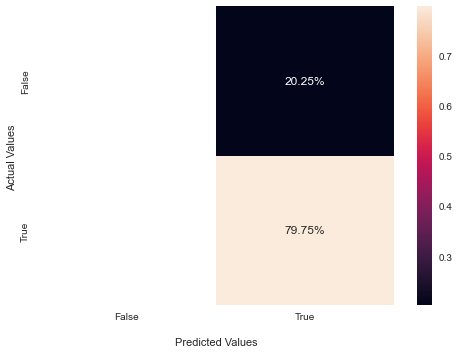

In [45]:
#matrix chart
from sklearn.metrics import confusion_matrix
from sklearn import metrics
matrix=pd.DataFrame(confusion_matrix(y_test, log_perform))
ax= sns.heatmap((matrix/np.sum(matrix)),fmt='.2%', annot=True)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

print('Accuracy: ', metrics.accuracy_score(y_test,log_perform))
plt.show()

In [42]:
model_2=RandomForestClassifier(min_samples_split=2,min_samples_leaf=7,max_leaf_nodes=None)
over_=SMOTE(sampling_strategy=0.5)
under_=RandomUnderSampler(sampling_strategy=0.7)
steps=[('o',over_) , ('u', under_),('model_2',model_2)]
pipe2= Pipeline(steps=steps)

In [43]:
pipe2.fit(x_train,y_train)
rand_perform=pipe2.predict(x_test)

Accuracy:  0.7608695652173914


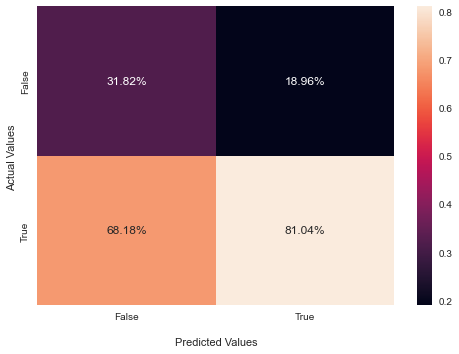

In [94]:
#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(y_test, rand_perform)
matrix=pd.DataFrame(confusion_matrix(y_test, rand_perform))
ax= sns.heatmap((matrix/np.sum(matrix)),fmt='.2%', annot=True)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
print('Accuracy: ', metrics.accuracy_score(y_test,rand_perform))
plt.show()

In [39]:
model_3=DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=20)
over_=SMOTE(sampling_strategy=0.5)
under_=RandomUnderSampler(sampling_strategy=0.7)
steps=[('o',over_) , ('u', under_),('model_3',model_3)]
pipe3= Pipeline(steps=steps)

In [40]:
pipe3.fit(x_train,y_train)
dec_perform=pipe3.predict(x_test)

Accuracy:  0.6910755148741419


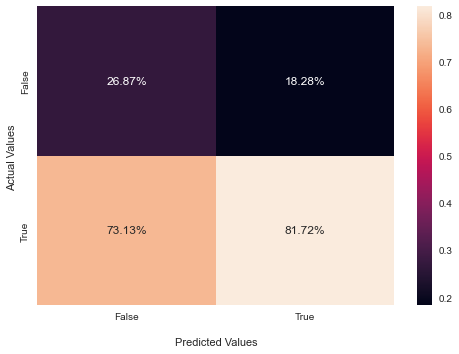

In [103]:
matrix=pd.DataFrame(confusion_matrix(y_test, dec_perform))
ax= sns.heatmap((matrix/np.sum(matrix)),fmt='.2%', annot=True)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
print('Accuracy: ', metrics.accuracy_score(y_test,dec_perform))
plt.show()

In [23]:
model_4=GradientBoostingClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=20)
over_=SMOTE(sampling_strategy=0.5)
under_=RandomUnderSampler(sampling_strategy=0.7)
steps=[('o',over_) , ('u', under_),('model_4',model_4)]
pipe4= Pipeline(steps=steps)

In [28]:
pipe4.fit(x_train,y_train)
grad_perform=pipe4.predict(x_test)

Accuracy:  0.782608695652174


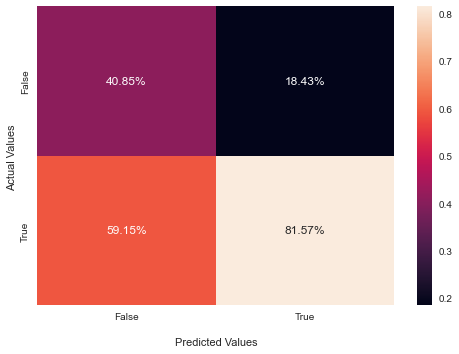

In [109]:
matrix=pd.DataFrame(confusion_matrix(y_test, grad_perform))
ax= sns.heatmap((matrix/np.sum(matrix)),fmt='.2%', annot=True)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
print('Accuracy: ', metrics.accuracy_score(y_test,grad_perform))
plt.show()

## Test it on Unknown data

In [37]:
#gradientboost
grad_perform_test=pipe4.predict(test_perform.drop(labels=['creationdate','approveddate','systemloanid','customerid'],axis=1))



In [38]:
#logistic regression
log_perform_test=pipe.predict(test_perform.drop(labels=['creationdate','approveddate','systemloanid','customerid'],axis=1))


In [41]:
#decision tree
dec_perform_test=pipe3.predict(test_perform.drop(labels=['creationdate','approveddate','systemloanid','customerid'],axis=1))


In [44]:
#random forest
rand_perform_test=pipe2.predict(test_perform.drop(labels=['creationdate','approveddate','systemloanid','customerid'],axis=1))


In [52]:
#create a dataframe
#accuracy levels
test_perform['gradientBoost']=grad_perform_test
test_perform['logisticRegression']=log_perform_test
test_perform['decisionTree']=dec_perform_test
test_perform['randomForest']=rand_perform_test

In [53]:
test_perform.sample(10)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,gradientBoost,logisticRegression,decisionTree,randomForest
537,8a858f005b396e23015b397ce2dc1159,301989850,5,50:55.0,50:43.0,20000,24500.0,30,1,1,1,1
1029,8a858f255ca276c5015ca6175ff526db,301989763,2,54:07.0,54:00.0,10000,11500.0,15,1,1,1,1
160,8a858e6c5c88d145015c8cd3a21d61d8,301968133,2,19:49.0,19:42.0,10000,13000.0,30,1,1,1,1
723,8a858ff05d128e7c015d12a0962e0c8d,301988583,2,29:07.0,29:01.0,10000,11500.0,15,1,1,1,1
1153,8a858e245a4f0e47015a5adda94f4429,301972400,7,15:09.0,15:04.0,30000,34500.0,30,1,1,1,1
996,8a8589ec54517bf90154682378410694,301975736,12,58:20.0,57:13.0,40000,48000.0,60,1,1,1,1
1064,8a858e0359b799e30159b7c4d72314cf,301974099,8,54:16.0,54:07.0,10000,12250.0,30,1,1,1,1
1070,8a858eaa5bed957a015bed9d7eae048b,301986210,5,03:34.0,03:26.0,20000,24500.0,30,1,1,1,1
975,8a8589045384bd8301538f539eb13617,302001661,13,43:45.0,43:20.0,30000,34500.0,30,0,1,1,1
484,8a858e9156e137c601570163db4358c9,301995543,4,07:57.0,07:50.0,20000,24500.0,30,1,1,1,1


<AxesSubplot:title={'center':'GradientBoost results'}, ylabel='Frequency'>

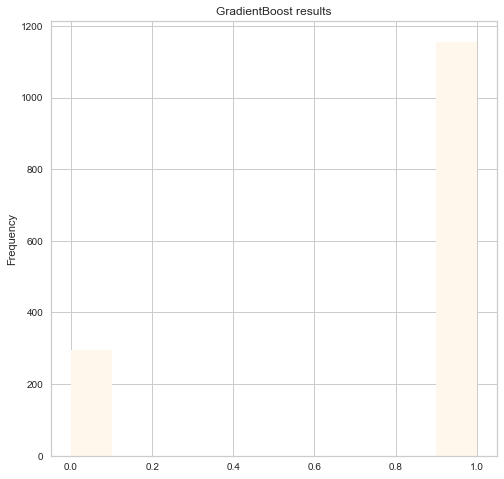

In [60]:
test_perform['gradientBoost'].plot(kind='hist',colormap='OrRd',figsize=(8,8),title=('GradientBoost results'))

<AxesSubplot:title={'center':'LogisticRegression results'}, ylabel='Frequency'>

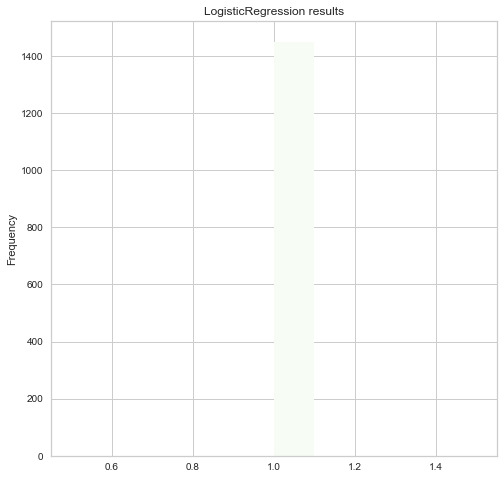

In [63]:
test_perform['logisticRegression'].plot(kind='hist',colormap='Greens',figsize=(8,8),title=('LogisticRegression results'))

<AxesSubplot:title={'center':'DecisionTree results'}, ylabel='Frequency'>

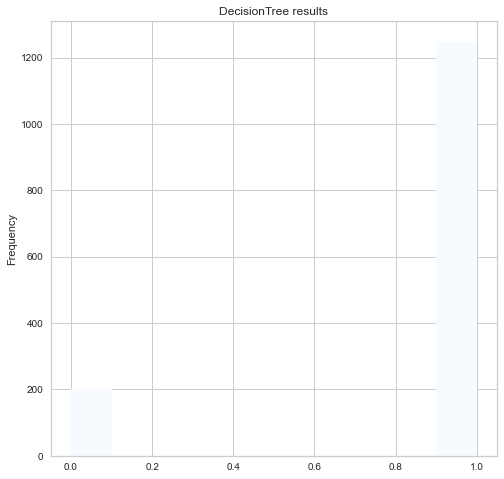

In [64]:
test_perform['decisionTree'].plot(kind='hist',colormap='Blues',figsize=(8,8),title=('DecisionTree results'))

<AxesSubplot:title={'center':'RandomForest results'}, ylabel='Frequency'>

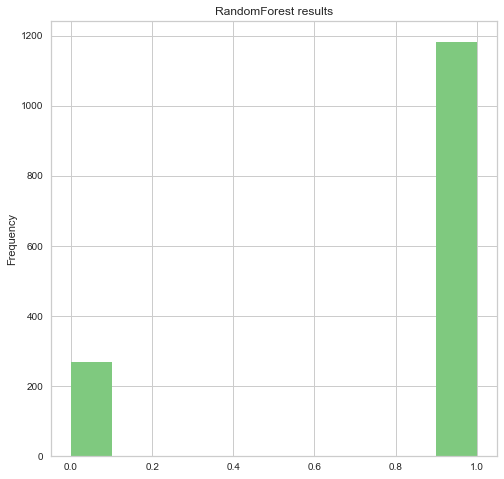

In [65]:
test_perform['randomForest'].plot(kind='hist',colormap='Accent',figsize=(8,8),title=('RandomForest results'))

## SECOND PART OF THE MODEL
- The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

In [74]:
testloans.drop(labels=['customerid','systemloanid','approveddate','creationdate','closeddate','firstrepaiddate','firstduedate'],axis=1,inplace=True)

In [76]:
new_loans=testloans[['loannumber','loandays','termdays','totaldue']]
target=testloans['loanamount']
X_train,X_test,Y_train,Y_test=train_test_split(new_loans,target,test_size=0.20,random_state=1234)

In [77]:
linear=LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train)
linear_pred=linear.predict(X_test)

In [80]:
#plot the model to see the prediction
min_point=new_loans.min()*linear.coef_[0] + linear.intercept_
max_point=new_loans.max()* linear.coef_[0] + linear.intercept_

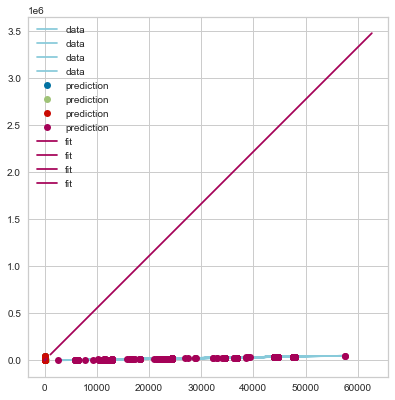

In [82]:
fig=plt.figure(figsize=(5,5))
dx=fig.add_axes([0,0,1,1])
dx.plot(X_test,Y_test,'c',label="data")
dx.plot(X_test,linear_pred,'o',label="prediction")
dx.plot([new_loans.min(),new_loans.max()],[min_point,max_point],'m',label="fit")
plt.legend(loc="best");

In [84]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_test,linear_pred)

0.9984201533490549

In [85]:
mean_squared_error(Y_test,linear_pred)

139759.4630603199